# Làm sạch dữ liệu

In [1]:
import pandas as pd

# Đọc dữ liệu
df = pd.read_csv("survey_results_public.csv")

# Chọn các cột liên quan
columns = [
    "ConvertedCompYearly", "OrgSize", "Industry", "RemoteWork", "JobSat",
    "YearsCodePro", "LearnCode", "LearnCodeOnline", "EdLevel", "Employment", "DevType"
]
df = df[columns].dropna()

# Làm sạch YearsCodePro
def clean_years_code(x):
    if x == "Less than 1 year":
        return 0.5
    elif x == "More than 50 years":
        return 51
    try:
        return float(x)
    except:
        return None

df["YearsCodePro"] = df["YearsCodePro"].apply(clean_years_code)

# Làm sạch EdLevel
def simplify_edlevel(x):
    if "Bachelor" in x:
        return "Bachelor"
    elif "Master" in x:
        return "Master"
    elif "Professional degree" in x or "Other doctoral" in x:
        return "Doctorate"
    else:
        return "Other"

df["EdLevel"] = df["EdLevel"].apply(simplify_edlevel)

# Xuất ra file CSV
df.to_csv("filtered_survey_subset.csv", index=False)


# Phân tích

In [2]:
df_1=pd.read_csv("filtered_survey_subset.csv")

<ipython-input-10-e72359396750>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_by_orgsize.values, y=avg_salary_by_orgsize.index, palette='viridis')


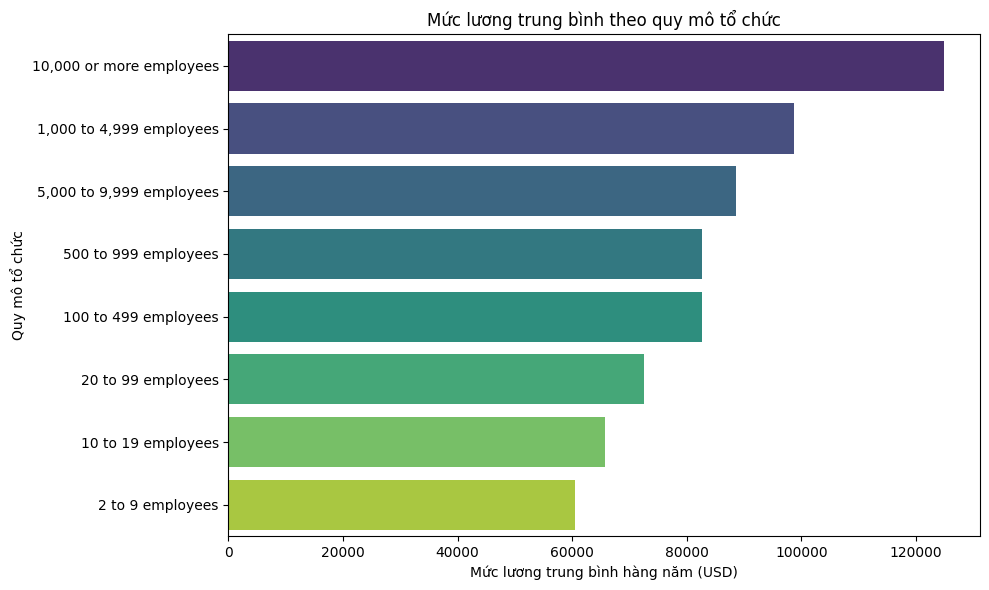

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


df_filtered = df_1[['OrgSize', 'ConvertedCompYearly']].dropna()
df_filtered = df_filtered[df_filtered['ConvertedCompYearly'] > 0]

# Danh sách các giá trị không phù hợp cần loại bỏ
invalid_values = [
    "I don’t know",
    "Just me - I am a freelancer, sole proprietor, etc."
]
# Lọc bỏ các giá trị không hợp lệ
df_filtered_1 = df_filtered[~df_filtered['OrgSize'].isin(invalid_values)].copy()

avg_salary_by_orgsize = df_filtered_1.groupby('OrgSize')['ConvertedCompYearly'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_salary_by_orgsize.values, y=avg_salary_by_orgsize.index, palette='viridis')
plt.xlabel('Mức lương trung bình hàng năm (USD)')
plt.ylabel('Quy mô tổ chức')
plt.title('Mức lương trung bình theo quy mô tổ chức')
plt.tight_layout()
plt.show()

Công ty càng lớn → lương càng cao
→ Tổ chức từ 10,000+ nhân viên có lương trung bình cao nhất (trên 120,000 USD/năm).

Công ty nhỏ trả lương thấp hơn đáng kể
→ Do hạn chế tài chính và ít cạnh tranh hơn trong tuyển dụng.

Tổ chức trung bình (100–999 nhân viên) vẫn duy trì mức lương ổn (~80,000 USD).
→ Là lựa chọn hợp lý nếu muốn cân bằng giữa lương và môi trường làm việc.



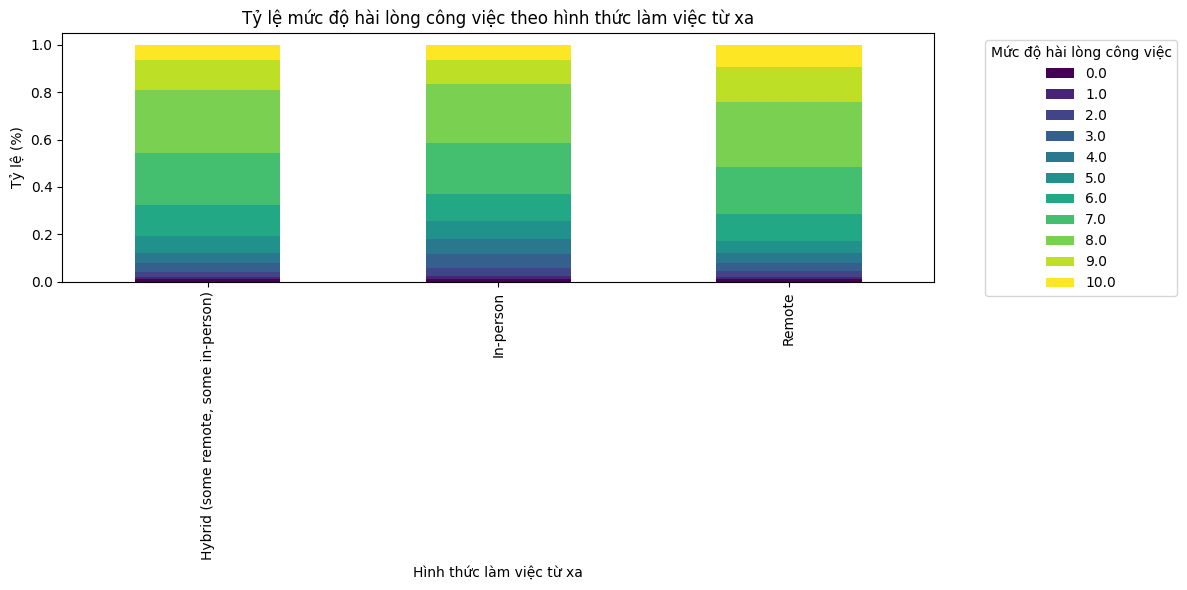

In [11]:
df_remote = df[['RemoteWork', 'JobSat']].dropna()

remote_job_sat_counts = df_remote.groupby(['RemoteWork', 'JobSat']).size().unstack().fillna(0)
remote_job_sat_percent = remote_job_sat_counts.div(remote_job_sat_counts.sum(axis=1), axis=0)

remote_job_sat_percent.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))
plt.title('Tỷ lệ mức độ hài lòng công việc theo hình thức làm việc từ xa')
plt.xlabel('Hình thức làm việc từ xa')
plt.ylabel('Tỷ lệ (%)')
plt.legend(title='Mức độ hài lòng công việc', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Làm việc từ xa (Remote) có tỷ lệ hài lòng cao nhất ở các mức điểm 8–10.
→ Chứng tỏ hình thức này được nhiều người đánh giá tích cực.

Làm việc kết hợp (Hybrid) cũng có mức hài lòng khá tương đồng với Remote.
→ Gợi ý rằng sự linh hoạt có ảnh hưởng tích cực đến trải nghiệm công việc.

Làm việc trực tiếp (In-person) có xu hướng thấp hơn một chút ở các mức hài lòng cao.
→ Có thể do kém linh hoạt hoặc thiếu sự tự chủ.



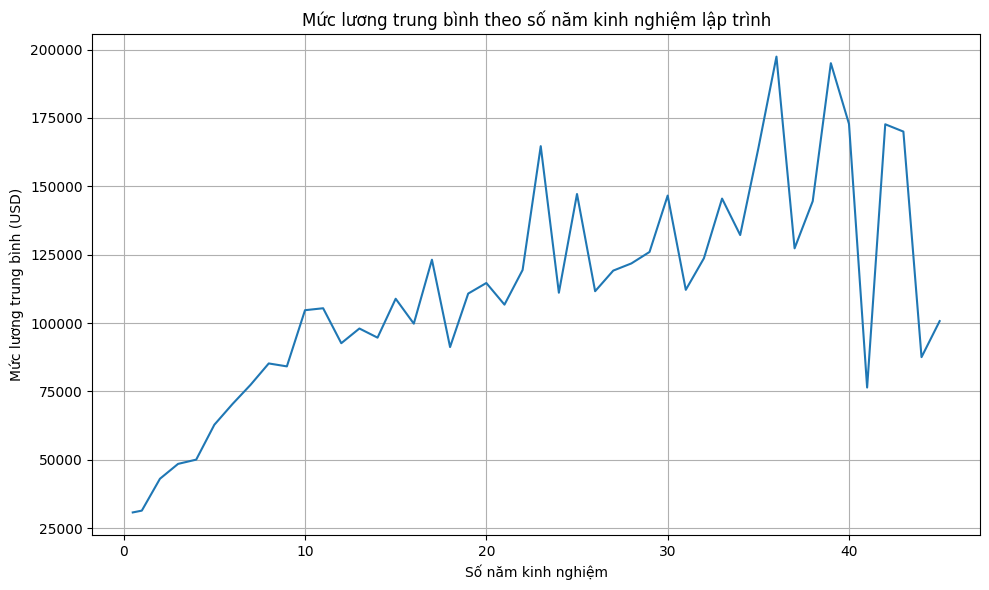

In [13]:
# Vẽ biểu đồ: mức lương trung bình theo số năm kinh nghiệm
df_exp_salary = df.groupby("YearsCodePro")["ConvertedCompYearly"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_exp_salary, x="YearsCodePro", y="ConvertedCompYearly")
plt.title("Mức lương trung bình theo số năm kinh nghiệm lập trình")
plt.xlabel("Số năm kinh nghiệm")
plt.ylabel("Mức lương trung bình (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

Kinh nghiệm càng nhiều thì mức lương càng cao, đặc biệt trong 10 năm đầu tiên.

Từ 10–25 năm, mức lương tăng chậm hơn và bắt đầu dao động.

Sau 30 năm, mức lương vẫn có thể cao nhưng không ổn định, có thể do dữ liệu ít hoặc người đã chuyển hướng nghề nghiệp.

Kết luận: 10 năm đầu là giai đoạn tăng trưởng lương mạnh nhất, phản ánh giá trị của việc tích lũy kỹ năng sớm.

<ipython-input-14-ae804402b739>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=learn_method_counts.index, x=learn_method_counts.values, palette="viridis")


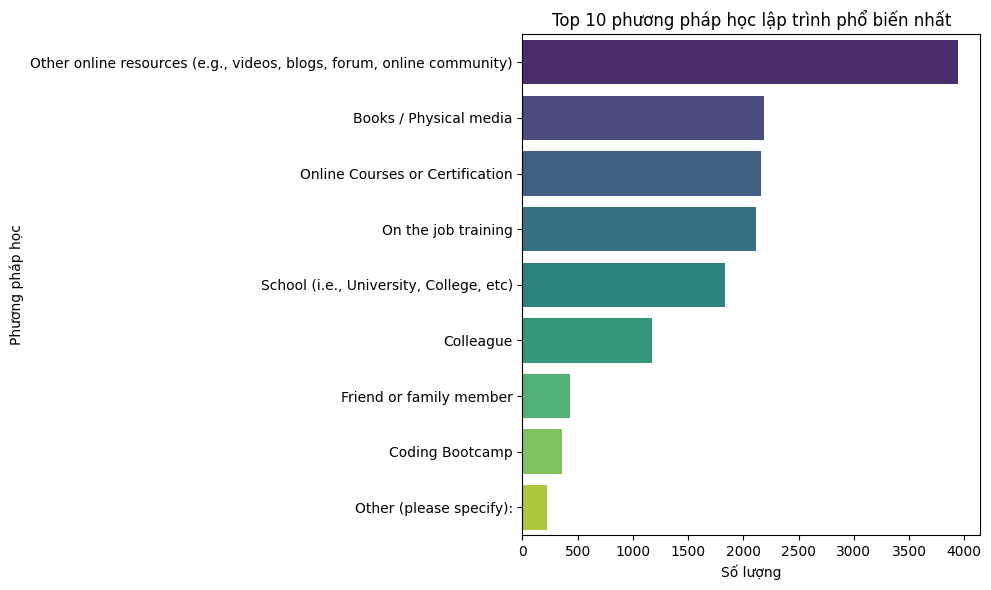

In [14]:
# Tách các phương pháp học (nhiều giá trị ngăn cách bằng dấu ;)
learn_methods = df["LearnCode"].str.split(";", expand=True).stack().str.strip()
learn_method_counts = learn_methods.value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=learn_method_counts.index, x=learn_method_counts.values, palette="viridis")
plt.title("Top 10 phương pháp học lập trình phổ biến nhất")
plt.xlabel("Số lượng")
plt.ylabel("Phương pháp học")
plt.tight_layout()
plt.show()

Tài nguyên học trực tuyến (videos, blogs, forum, cộng đồng) là phương pháp phổ biến nhất, với gần 4.000 người lựa chọn — chứng tỏ xu hướng tự học qua Internet đang chiếm ưu thế.

Các phương pháp như sách/báo và khóa học online/chứng chỉ cũng rất phổ biến, mỗi nhóm thu hút khoảng 2.200–2.300 người.

Đào tạo tại chỗ (on-the-job training) và giáo dục chính quy (trường đại học/cao đẳng) vẫn giữ vai trò quan trọng, nhưng đứng sau hình thức học chủ động, linh hoạt.

Các hình thức như Coding Bootcamp hoặc học từ gia đình/bạn bè ít phổ biến hơn nhiều.

Kết luận: Học lập trình hiện đại nghiêng về tính tự chủ, linh hoạt và dựa vào cộng đồng trực tuyến, cho thấy sự dịch chuyển từ giáo dục truyền thống sang mô hình học tập phi chính quy.

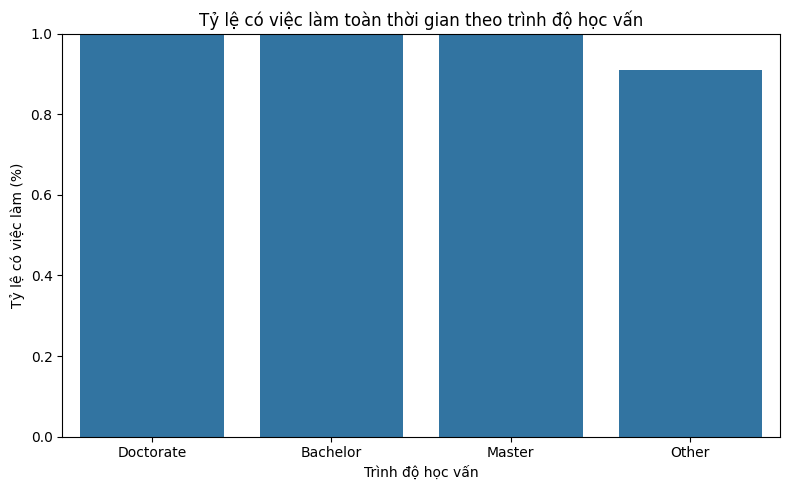

In [15]:
# Tính tỷ lệ có việc theo từng nhóm học vấn
job_counts = df[df["Employment"] == "Employed, full-time"]["EdLevel"].value_counts(normalize=True)
all_counts = df["EdLevel"].value_counts(normalize=True)

employment_rate = (job_counts / all_counts).dropna().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=employment_rate.index, y=employment_rate.values)
plt.title("Tỷ lệ có việc làm toàn thời gian theo trình độ học vấn")
plt.ylabel("Tỷ lệ có việc làm (%)")
plt.xlabel("Trình độ học vấn")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


Các nhóm có bằng Tiến sĩ (Doctorate), Thạc sĩ (Master) và Cử nhân (Bachelor) đều có tỷ lệ có việc làm toàn thời gian gần như tuyệt đối (≈100%).

Nhóm “Other” (bao gồm các trình độ không chính quy hoặc học vấn thấp hơn) có tỷ lệ thấp hơn, khoảng 90–95%, nhưng vẫn ở mức cao.

Điều này cho thấy:

 - Trình độ học vấn cao có liên hệ chặt chẽ với cơ hội việc làm ổn định trong ngành công nghệ.
 - Tuy nhiên, ngay cả những người không có bằng cấp chính quy vẫn có thể tìm được việc làm toàn thời gian – phản ánh đặc trưng cởi mở và kỹ năng-orientated của ngành.

# Đề xuất cải thiện


1. Tăng cường kinh nghiệm thực tế

  - Khuyến khích tham gia dự án, thực tập sớm để tăng lương theo thời gian.

2. Thúc đẩy tự học trực tuyến

 - Hỗ trợ tài nguyên học từ video, blog, khóa học online – phương pháp phổ biến nhất.

3. Linh hoạt trong yêu cầu học vấn

 - Bằng cấp cao giúp dễ kiếm việc, nhưng kỹ năng thực tế vẫn rất quan trọng.

4. Phát triển môi trường học tập và làm việc linh hoạt

 - Kết hợp giữa học online và làm việc từ xa nếu có điều kiện.

5. Chú trọng sự hài lòng và phát triển cá nhân

 - Doanh nghiệp cần lắng nghe nhân viên, tạo cơ hội học hỏi và thăng tiến.